<a href="https://colab.research.google.com/github/JoshuaPaul-lasisi/Customer_segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUSTAINABLE ACHIEVERS Project 1: Customer Segmentation

# Project Overview

**Introduction:**
Welcome to our collaborative notebook! In this section, we'll provide an overview of our project and the goals of the EDA phase.

**Project Background:**
Our project aims to perform customer segmentation analysis using an E-Commerce data gotten from Kaggle. The dataset includes [brief description of dataset contents].

**Objective:**
The primary objective of our EDA phase is to gain a deeper understanding of the dataset and identify key insights that will inform our segmentation strategy. By exploring various aspects of the data, we aim to uncover patterns, trends, and relationships that can guide our segmentation approach.

**Team Collaboration:**
We have divided the EDA tasks among team members to ensure efficient collaboration and thorough analysis. Each team member is responsible for investigating specific aspects of the data and providing insights based on their findings.

**Notebook Structure:** 
- Data Loading and Cleaning
- Univariate Analysis
- Bivariate Analysis
- Categorical Variable Analysis
- Time Series Analysis
- Outlier Detection

**Instructions:**
- Each team member should focus on their assigned section and provide detailed analysis and visualizations.
- Feel free to collaborate with other team members if you need additional insights or assistance.
- Document your findings clearly and provide explanations for any decisions or observations made during the analysis.

**Expected Output:**
By the end of the EDA phase, we aim to have a comprehensive understanding of the dataset, including its characteristics, distributions, and relationships between variables. This will lay the foundation for our segmentation modeling efforts in the next phase of the project.


Let's dive into the analysis and uncover valuable insights together!


# Introduction

Necessary imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


...and the dataframe to be used


In [ ]:
# Second Dataframe used in the kaggle we went through in our meeting
df = pd.read_csv('https://raw.githubusercontent.com/sheidheda/SusAc-ML-Files/main/cs_data2.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Loading & Cleaning

This section of the notebook focuses on preparing the dataset for analysis by loading it into the environment and performing initial data cleaning steps. These steps are crucial to ensure that the data is in a usable format and free from any inconsistencies that could affect the analysis results. This section will address any missing values, outliers, and duplicates in the dataset, ensuring that the data is clean and ready for further analysis.

______________________________________
### Peeking under the hood of the data



We get a quick glance of the data. Why?

To check:
- How big the data is
- the kind of data in each column
- to check for possible missing values
- to check how much space our data takes

In [ ]:
#checking the info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We now have answers to our questions:
- **Data size** -> 541,909 entries
- **Kind of data** -> the dataset contains a mix of data types
- **Possible missing values** -> Description and CustomerID have non-null counts less than the total number of entries. This indicates that there might be missing values in these columns
- **Space data takes** -> Memory usage is approximately 33.1+ MB


A more concise depiction of our dataset inspecting the dimensions of our dataset shows our dataset is **large** with 541,909 columns and 8 columns as seen below


In [ ]:
df.shape

(541909, 8)

The **CustomerID** column should not be a float but a string since it is an identifier that could have leading zeros especially for older customers.

We will therefore convert it to string and remove the decimal point

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str).str[:-2]

The **Quantity** ordered should not be less than zero for it to get into an invoice. But just in case, we will check it...

In [ ]:
# to check whether quantity column has negative values
if (df['Quantity'].unique() <0).any():

  print("there is presence of Negative values")

there is presence of Negative values


This shows that we have **refunds** in our dataset. We will consider this is in our **segmentation**.

## Sorting out duplicates

The next step is to consider if we have any duplicates in the data.

For large data like this, we will employ the **.duplicate()** function which shows columns with repeated values for all columns.

In [ ]:
# Identify rows with duplicate values across all columns in df2
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
number_of_duplicates = len(duplicates)

# Print a message to inform the user about the results
print(f"The DataFrame df has {number_of_duplicates} duplicate rows.")

The DataFrame df has 5268 duplicate rows.


...to view them

In [ ]:
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446,United Kingdom


Considering that they are redundancies, we will remove them **completely** from the dataframe.

In [ ]:
# Drop the duplicates
df.drop_duplicates(inplace = True)

Our next course of action is to confirm if we have any missing values in our dataset.

To specify which columns have missing values...

##  Correcting missing values

In [ ]:
# Check for missing values in df2
missing_values = df.isnull().sum()

# Calculate missing value percentages as a ratio (avoiding data type issues)
missing_percentages = (missing_values / len(df)) * 100

# Print a summary of missing values for each column
for col in df.columns:
  # Check if there are any missing values (avoiding unnecessary comparisons)
  if missing_values[col] > 0:
    print(f"Column '{col}' has {missing_values[col]} missing values ({missing_percentages[col]:.2f}%)")

Column 'Description' has 1454 missing values (0.27%)


We find that the **Description** and **CustomerID** columns have 1454 and 135037 missing values respectively.

Since CustomerID identifies the customer and Description identifies the product, let's see if there are cases where both product and customer are not identified

In [ ]:
# columns with both description and CustomerID as null
no_id_desc = df[(df['Description'].isnull()) & (df['CustomerID'].isnull())]
no_id_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We are **positive** that there are such columns and we also notice that they are the **exact same amount** as the amount of missing values in the Description column.

We can conclude that this is a subset of the rows with missing customer identifiers.

Another **observation** is that some of our unit prices are **zero**. Let's check how many...

In [ ]:
no_id_desc['UnitPrice'].unique()

array([], dtype=float64)

**All of them!!!!**
Since there is not unit price, it means there is no sale.

When there is no sale, there is no customer.

This part of the data therefore adds no value to our **customer segmentation** then.

We will continue without them.

In [ ]:
df_null = df[-df['Description'].isnull()]

Now we check how many null values we have left in the dataset

In [ ]:
df_null.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_null['CustomerID'].fillna('Null', inplace = True)

df_null.isnull().sum()

<ipython-input-68-dd59f8bd1a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['CustomerID'].fillna('Null', inplace = True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## The finished work

In [ ]:
df_cleaned = df_null

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# Univariate Analysis

This section of this notebook focuses on exploring individual features in the dataset to gain insights into their distributions and characteristics. This analysis is important for understanding the data's overall structure and identifying any patterns or anomalies that may exist within the features. In this section, we will compute summary statistics for numerical features and examine the distributions of both numerical and categorical features through histograms and value counts.

- Task: Conduct univariate analysis to explore individual features in the dataset, including summary statistics, histograms, and distributions.
- Necessary questions:
  - What are the summary statistics (mean, median, min, max) for numerical features?
  - What are the most common categories for categorical features?


<b>Team 2</b>


kami D sima  
Omar
Nina      

Dede

Before starting with the Univariate Analysis. Let's first make sure we understand what exactly it means.

What is Univariate Analysis? (You may ask)

It is the examination of the distribution and characteristics of a single variable. (Seems too complicated an example yeah?)

Well let's consider a simple example, one that is unrelated to this notebook.

Okay, imagine you bought some boxes of crayons. If you wanted to study just one color, like blue, and see how much all the blue crayons cost, that's like doing univariate analysis. You're focusing on just the cost of that one color without thinking about anythinf else.

Now that the explanations are out of the way, Let's get right to it.

Let's first of all make sure what exactly exists in our dataframe before we begin selecting the variable that we'll be studying.

In [ ]:
#This will just print out our cleaned dataframe (so we can take a good look at all the colors in our boxes)
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Great! Now that that's out of the way, this next code will just show summary statistics to help us understand how spread our data is.

Since we're looking to get the summary statistics for our selected variable, let's name it **'selected_var'** for **'Selected Variable'**

More to the point, we'll be looking at the Quantity column, so let's tweak our variable name to be **'selected_var_qty'** for **'Selected Variable: Quantity'**


In [ ]:
selected_var_qty = df_cleaned['Quantity']
selected_var_qty = selected_var_qty.describe()
print("\nThe Summary statistics for our Quantity column are:")
print(selected_var_qty)


The Summary statistics for our Quantity column are:
count    535187.000000
mean          9.671593
std         219.059056
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


This is a breakdown of the summary stats provided by the code we just ran

---

* count: This is the number of non-null values in the 'Quantity' column, which is 535187 in this case, and that tells us that all the rows in our dataframe have entries in them.

* mean: This is the average value of the 'Quantity' column, calculated as 9.671593 (approximately 10), which tells us that the average customer buys 9 to 10 products.

* std: This is the standard deviation of the 'Quantity' column, which measures the dispersion of values around the mean. It is approximately 219.059056.

* min: This is the minimum value in the 'Quantity' column, which is -80995.

* 25%: This is the 25th percentile of the 'Quantity' column. This means that 25% of the values in the column are less than or equal to 1.000000.

* 50%: This is the median (or 50th percentile) of the 'Quantity' column. Half of the values in the column are less than or equal to 3.000000.

* 75%: This is the 75th percentile of the 'Quantity' column. 75% of the values in the column are less than or equal to 10.000000.

* max: This is the maximum value in the 'Quantity' column, which is 80995.

Because of how far apart our min and max values are, we can say that our dataset is very widely spread, and this might have caused our other values to stray too far to the left of the number line.



---



Now the next thing we'll be looking at is pricing, but what we have in our dataframe is the unit price of our products, we do have transactions where the same product was purchased in relatively large amount.

So for that we will be creating a new column called "Total Price", this column will return the result of a multiplication between the Unit Price and Quantity columns.

In [ ]:

df_cleaned["Total Price"] = df_cleaned["UnitPrice"] * df_cleaned["Quantity"]
df_cleaned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


Now that we have our Total Price column, the next thing to do is to take a look at the summary statistics for the Total Price column.

Since we used **"selected_var_qty"** for the quantity column, we will be using **"selected_var_rev"** for **"Selected Variable: Total Price"**

In [ ]:
selected_var_rev = df_cleaned['Total Price']
selected_var_rev = selected_var_rev.describe()
print("\nThe Summary statistics for our Total Price column are:")
print(selected_var_rev)


The Summary statistics for our Total Price column are:
count    535187.000000
mean         18.173100
std         381.171824
min     -168469.600000
25%           3.750000
50%           9.900000
75%          17.400000
max      168469.600000
Name: Total Price, dtype: float64


This is a breakdown of the summary stats provided by the code we just ran

---


* count: This is the number of non-null values in the 'Total Price' column, which is 535187. This tells us that all rows in our DataFrame have entries in the 'Total Price' column.

* mean: This is the average value of the 'Total Price' column, calculated as 18.173100. This means that, on average, the total price of an order is approximately 18.17.

* std: This is the standard deviation of the 'Total Price' column, which measures the dispersion of values around the mean. It is approximately 381.171824, indicating a wide spread in the total price values.

* min: This is the minimum value in the 'Total Price' column, which is -168469.600000. This negative value might indicate potential data issues or refunds.

* 25%: This is the 25th percentile of the 'Total Price' column. This means that 25% of the total price values are less than or equal to 3.750000.

* 50%: This is the median (or 50th percentile) of the 'Total Price' column. Half of the total price values are less than or equal to 9.900000.

* 75%: This is the 75th percentile of the 'Total Price' column. 75% of the total price values are less than or equal to 17.400000.

* max: This is the maximum value in the 'Total Price' column, which is 168469.600000. This high value might indicate large orders or outliers in the data.

Again, Because of how far apart our min and max values are, we can say that our dataset is very widely spread, and this might have caused our other values to stray too far to the left of the number line.



---


Now that all that's behind us, let us take a look at our country column.

So first things first we will check exactly how many unique entries we have in our country column and print them out so we can see them. Shall we then?

In [ ]:

print("There are " + str(df_cleaned['Country'].nunique()) + " unique country names in our dataframe")


There are 38 unique country names in our dataframe




---


As outputted above, we can see that we have customers from 38 different countries (diverse customer base type shit innit 😁😁😁😁😁).



---

The next thing to do would be to print out these country names, so that we can take a look. Much like with the **"SV"** we used earlier, since we're dealing with our Country column, let's name the variable **"country_list"** for **"Country List".**

In [ ]:
country_list = df_cleaned['Country'].unique()
country_list_df = pd.DataFrame(country_list, columns = ['Country List'])
country_list_df

,Country List
0,United Kingdom
1,France
2,Australia
3,Netherlands
4,Germany
5,Norway
6,EIRE
7,Switzerland
8,Spain
9,Poland




---


Now that we have seen a list of all 38 countries in our dataframe, The next thing we will be doing is to rank these countries in order of just how much revenue is gotten from them (Let's identify the country that our dataframe's Elon Musk is in)


---

So standing on existing protocol, since we are ranking in order of how much revenue we make, that tells us that we'll be working with our "Total Price" column. We will be naming the variable **"countries_by_qty"** for **"Countries (ranked) By Quantity"** Let us work with a copy of our dataframe this time around (This would help us have something like a "Save Progress" area like in video games).

We will name this copy dataframe "check_point" for "Save Point".

In [ ]:
# Create a copy of the cleaned DataFrame
check_point = df_cleaned.copy()

# Group by 'Country' and sum the 'Quantity' column, then sort the values in descending order
countries_by_qty = check_point.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Convert the resulting Series to a DataFrame
countries_by_qty = pd.DataFrame(countries_by_qty).reset_index()

# Rename the column for clarity
countries_by_qty.columns = ['Country', 'Total Quantity']

check_point_df = countries_by_qty
# Print the DataFrame to verify the results
check_point_df


,Country,Total Quantity
0,United Kingdom,4263937
1,Netherlands,200128
2,EIRE,142495
3,Germany,117341
4,France,110438
5,Australia,83643
6,Sweden,35632
7,Switzerland,30313
8,Spain,26817
9,Japan,25218




---

This looks like a lot to look at, so let's focus instead on the top 5 Countries



---

Let us name this new variable "top_5_countries_qty" for "Top 5 Countries By Quantity.


In [ ]:
top_5_countries_qty = check_point_df.head(5)
top_5_countries_qty

,Country,Total Quantity
0,United Kingdom,4263937
1,Netherlands,200128
2,EIRE,142495
3,Germany,117341
4,France,110438


With the finesse of a commentator, here is a breakdown of what the above table shows us

---

Ladies and gentlemen, what an exciting race we've witnessed in the world of commerce! The final numbers are in, and it's the United Kingdom that takes the gold medal with a staggering total quantity of 4,263,937 items ordered! An absolutely dominant performance, leaving the competition in the dust.

But wait, the Netherlands isn't far behind, securing the silver with an impressive 200,128 items. The Dutch have shown their mettle, proving they're a force to be reckoned with in the marketplace.

In third place, we have EIRE, clinching the bronze with 142,495 items. A solid performance that keeps them firmly on the podium, showcasing their consistent demand.

Germany follows closely, with a total quantity of 117,341 items. The Germans have displayed their usual efficiency and robustness, securing a commendable fourth place.

And rounding out the top five, it's France with 110,438 items. The French have put in a valiant effort, demonstrating their strong market presence and finishing in a respectable fifth place.

What a spectacular showdown! Each of these countries has shown remarkable prowess, but today, it's the United Kingdom standing tall at the top of the leaderboard. Congratulations to all the contenders!

So now that we have seen our top performers in terms of Quantity, let's look next at what the ranking would be like if we focused on the revenue (Total Price) instead of the quantity.


---

We used **"countries_by_qty"** for our ranking by quantity, so let us use **"countries_by_rev"** for **"Countries (ranked) By Total Price"**

In [ ]:
# Create a copy of the cleaned DataFrame
check_point_2 = df_cleaned.copy()

# Group by 'Country' and sum the 'Quantity' column, then sort the values in descending order
countries_by_rev = check_point_2.groupby('Country')['Total Price'].sum().sort_values(ascending=False)

# Convert the resulting Series to a DataFrame
countries_by_rev = pd.DataFrame(countries_by_rev).reset_index()

# Rename the column for clarity
countries_by_rev.columns = ['Country', 'Total Revenue']

check_point_2_df2 = countries_by_rev
# Print the DataFrame to verify the results
check_point_2_df2

,Country,Total Revenue
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110
5,Australia,137009.770
6,Switzerland,56363.050
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410



Now we have our countries ranked by revenue, as you can see the top 5 countries are still the same even when we rank by revenue generated, but as you go further down the list you see that the rankings are not exactly the same

---

Again, this is a lot to look at, so let us focus on the top 5 countries still (We're trying to find our Elon Musks innit?)



In [ ]:
top_5_countries_rev = check_point_2_df2.head(5)
top_5_countries_rev

,Country,Total Revenue
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110



With the same type of flair, let's get right to it

---

Taking a second look at the total value of orders from our top-performing countries. Leading the pack yet again, we have the United Kingdom with an astonishing total price of 8,167,128.18. The UK has shown exceptional market strength, firmly establishing itself at the top.

Next up, claiming second place, is the Netherlands with a commendable total price of 284,661.54. The Dutch market continues to prove its significant contribution with this impressive figure.

In third place, we see EIRE, with a total price of 262,993.38. This solid performance demonstrates EIRE's consistent demand and purchasing power.

Close on their heels is Germany, coming in fourth with a total price of 221,509.47. The German market, known for its reliability, maintains a strong presence in the upper ranks.

Rounding out our top five, we have France with a total price of 197,317.11. The French market remains robust, showcasing its important role in the overall sales landscape.

Each of these countries has made a remarkable impact on the total sales value, highlighting their significant contributions and market strength. Congratulations to all our top performers!



This brings the Univariate Analysis Section to a close

---


# Bivariate Analysis

This section of this notebook focuses on investigating relationships between pairs of variables in the dataset. This analysis aims to uncover any patterns or trends that exist between variables, helping to understand how they relate to each other. In this section, we will use scatter plots to visualize the relationships between numerical features and correlation matrices and heatmap visualizations to quantify and visualize the correlations. We will also examine how different categorical features relate to each other using contingency tables and visualizations.

  - Task: Investigate relationships between pairs of variables in the dataset through bivariate analysis, including scatter plots, correlation matrices, and heatmap visualizations.
  - Necessary questions:
    - Are there any correlations between numerical features?
    - How do different categorical features relate to each other?

    
<b>Team 3</b>

Amarachi

Franklin

Mr langat


In [ ]:
# identification of numerical features
numerical_df = df_cleaned.select_dtypes(include=np.number)
numerical_df.head()

,Quantity,UnitPrice,Total Price
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


Only the columns 'Quantity', 'UnitPrice', and 'Total Price' contain numerical data in the dataset.

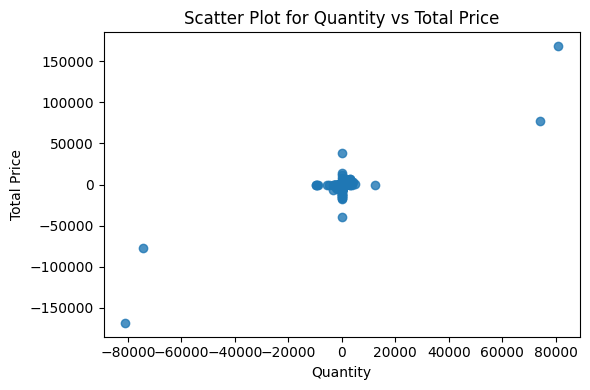

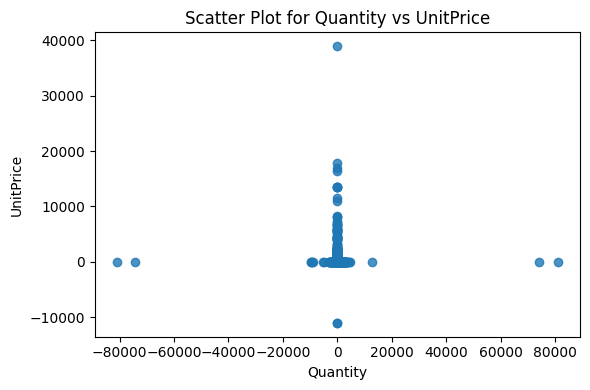

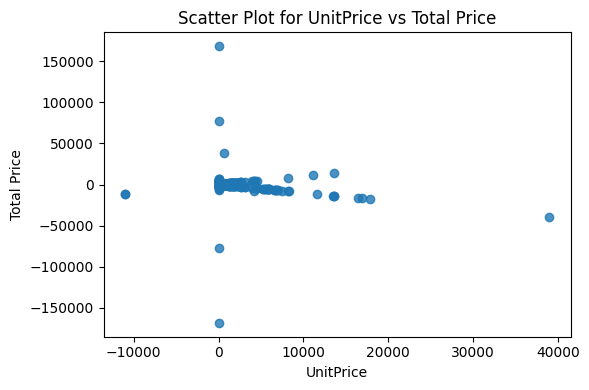

In [ ]:
# Using Scatter plots to identify relationships between the numerical features
def scatter_plot(df, x_column, y_column, title):
    """
    Create a scatter plot.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        x_column (str): Name of the column to be plotted on the x-axis.
        y_column (str): Name of the column to be plotted on the y-axis.
        title (str): Title of the scatter plot.
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x_column], df[y_column], alpha=0.8)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.tight_layout()
    plt.show()

# Scatter plot for Quantity vs Total Price
scatter_plot(df_cleaned, 'Quantity', 'Total Price', 'Scatter Plot for Quantity vs Total Price')

# Scatter plot for Quantity vs UnitPrice
scatter_plot(df_cleaned, 'Quantity', 'UnitPrice', 'Scatter Plot for Quantity vs UnitPrice')

# Scatter plot for UnitPrice vs Total Price
scatter_plot(df_cleaned, 'UnitPrice', 'Total Price', 'Scatter Plot for UnitPrice vs Total Price')

Based on the plots above, we observe that the majority of data points are clustered around the origin (0,0), without a clear pattern. However, there are outliers present that deviate from the general trend. Additionally, there is no apparent linear relationship between the numerical features.

###Correlation matrices

Since there was no notable relationship between the numerical features, We proceed to display the intrarelationship between both the numerical and categorical variables. We also provide corresponidng heatmaps to visualize the information.

In [ ]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = df_cleaned[['Quantity', 'UnitPrice', 'Total Price']].corr()
correlation_matrix

,Quantity,UnitPrice,Total Price
Quantity,1.000000,-0.001254,0.888196
UnitPrice,-0.001254,1.000000,-0.162050
Total Price,0.888196,-0.162050,1.000000


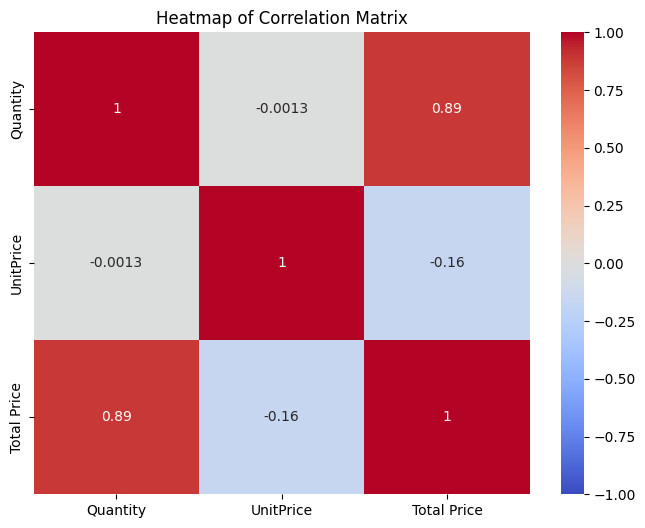

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The code below uses Cramer's V correation to encode the categorical data. The encoded data is used to create a crosstabulation table to calculate the correlation before deriving the matrix and the heatmap.

**Points to note:**


*   We have used chi_square statistics to calculate Cramer's V correlation
*   The whole dataset was quite huge, and creating a correlation matrix was constrained by limited runtime resources
*   We created a sample dataframe consisting of only 10% (53,518 rows) randomly selected from the larger dataset


             InvoiceNo  StockCode  Description  InvoiceDate  CustomerID  \
InvoiceNo         1.00       0.50         0.51         1.00        1.00   
StockCode         0.50       1.00         0.99         0.49        0.26   
Description       0.51       0.99         1.00         0.50        0.27   
InvoiceDate       1.00       0.49         0.50         1.00        0.97   
CustomerID        1.00       0.26         0.27         0.97        1.00   
Country           1.00       0.24         0.25         0.98        0.97   

             Country  
InvoiceNo       1.00  
StockCode       0.24  
Description     0.25  
InvoiceDate     0.98  
CustomerID      0.97  
Country         1.00  


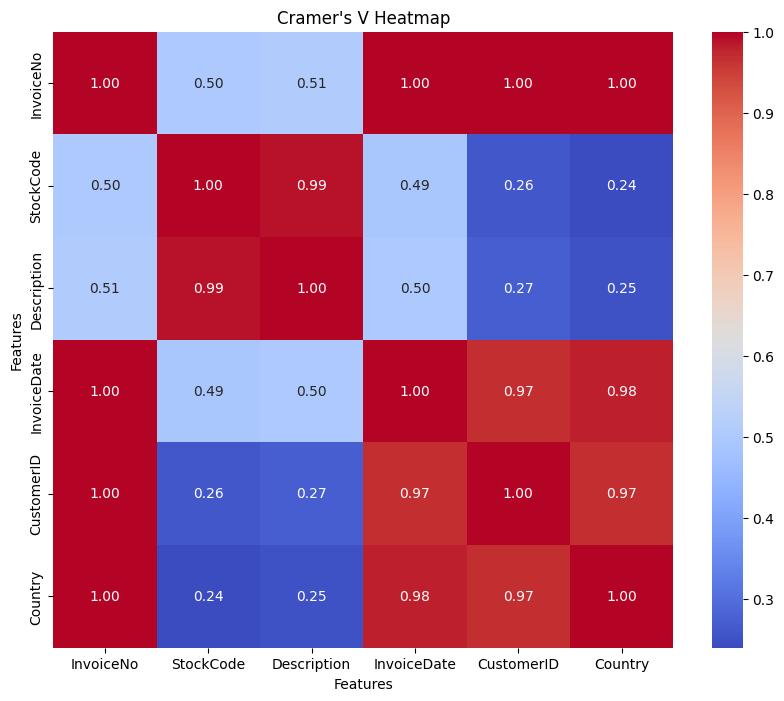

In [ ]:
 from scipy.stats import chi2_contingency
from sklearn import preprocessing

# Create a new DataFrame with 1/10 of the rows from df_cleaned
df_sampled = df_cleaned.sample(frac=0.1, random_state=42)

# Define the columns to exclude
numerical_features = ['Quantity','UnitPrice','Total Price']

# Select the columns that are not in the exclusion list
selected_columns = [col for col in df_sampled.columns if col not in numerical_features]

# Initialize the Label Encoder
label = preprocessing.LabelEncoder()

# Create an empty DataFrame to store the encoded data
data_encoded = pd.DataFrame()

# Apply Label Encoding to each of the selected columns
for col in selected_columns:
    if df_sampled[col].dtype == 'object':  # Apply Label Encoding only to categorical columns
        # Convert all values to strings to handle mixed types
        data_encoded[col] = label.fit_transform(df_sampled[col].astype(str))
    else:
        data_encoded[col] = df_cleaned[col]


# Define the Cramer's V function
def cramers_V(var1, var2):

    """Calculate Cramer's V statistic for categorical-categorical association.

    This function calculates Cramer's V, a measure of association between two categorical variables.
    It takes two pandas Series (`var1` and `var2`) as input and returns the Cramer's V statistic.

    Args:
        var1 (pandas.Series): The first categorical variable.
        var2 (pandas.Series): The second categorical variable.

    Returns:
        float: The Cramer's V statistic.
    """

    # Building the cross-tabulation table
    crosstab = np.array(pd.crosstab(var1, var2))

    # Calculate the chi-squared statistic
    chi2_stat, _, _, _ = chi2_contingency(crosstab)

    # Number of observations
    n = crosstab.sum()

    # Take the minimum value between the number of rows and columns of the cross-tabulation table, minus 1
    min_dim = min(crosstab.shape) - 1

    # Calculate Cramer's V
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    return cramers_v


# Build the matrix of Cramer's V values
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers, 2)) # Keeping the rounded value of Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df_cramers_v = pd.DataFrame(cramers_results, columns=data_encoded.columns, index=data_encoded.columns)

# Display the Cramer's V matrix
print(df_cramers_v)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cramers_v, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

###Interpretations
1.  *Are there any correlations between numerical features?*
Yes. There is a strong positive correlation between Quantity and Total Price. A slighly negative relationhsip exists between unit price and quantity. None exists between unit price and quanity.

2. *How do different categorical features relate to each other?*
*   Invoice No, Invoice Date, Customer ID, and Country are very strongly correlated with each other (correlation values very close to 1)
*   Stock Code and Description have a strong correlation due to their one-to-one mapping




# Time Series Analysis

This section of this notebook focuses on exploring temporal patterns in the dataset. This analysis is crucial for understanding how data changes over time and identifying any recurring patterns or trends, such as seasonality or cycles. In this section, we will use line plots to visualize the temporal distribution of data, seasonal decomposition to decompose the data into trend, seasonal, and residual components, and autocorrelation plots to identify any correlation between lagged values.

- Task: Explore temporal patterns in the dataset through time series analysis, including line plots, seasonal decomposition, and autocorrelation plots.
- Necessary questions:
  - How does the distribution of data change over time?
  - Are there any seasonal or cyclical patterns in the data?

<b>Team 4</b>

Faith

Jesse

Hardeyronkeh

Praise Cookie



In [ ]:
# First we make a copy to play with andview the data
time_df = df_cleaned.copy()
time_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Now we Ensure the InvoiceDate column is in datetime format.
time_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
 8   Total Price  535187 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.8+ MB


Next we Extract Time-Based Features:

To do this we Create additional columns like Year, Month, Day, Hour, Weekday from InvoiceDate for more granular analysis.

In [ ]:
time_df['Year'] = time_df['InvoiceDate'].dt.year
time_df['Month'] = time_df['InvoiceDate'].dt.month
time_df['Day'] = time_df['InvoiceDate'].dt.day
time_df['Hour'] = time_df['InvoiceDate'].dt.hour
time_df['Weekday'] = time_df['InvoiceDate'].dt.weekday


Next we Calculate total revenue for each transaction and create a column for it.

In [ ]:
time_df['TotalRevenue'] = time_df['Quantity'] * time_df['UnitPrice']


In [ ]:
time_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Year,Month,Day,Hour,Weekday,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4,16.60


Let's see the period our data covers

In [ ]:
print(f"Our data starts on {time_df['InvoiceDate'].min()} and ends on {time_df['InvoiceDate'].max()} ")

Our data starts on 2010-12-01 08:26:00 and ends on 2011-12-09 12:50:00 


Now we try to see the monthly revenue generated since the data spans over one year



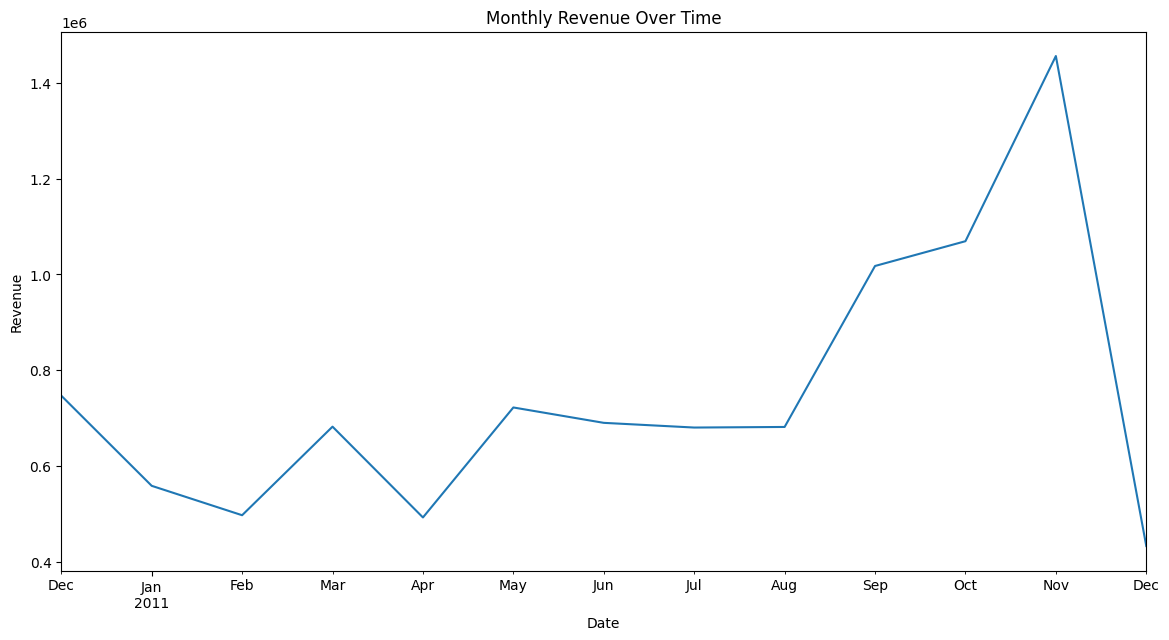

In [ ]:
monthly_revenue = time_df.set_index('InvoiceDate').resample('M')['TotalRevenue'].sum()

# Lets visualise it for better insight
plt.figure(figsize=(14, 7))
monthly_revenue.plot()
plt.title('Monthly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

Interesting! We can see peaks around March and May. Then the obvious massive rise in the Ember months and a all time high mid November.. What could these mean. holiday shopping? Christmas and other holidays?

In [ ]:
time_df['InvoiceDate'] = pd.to_datetime(time_df['InvoiceDate'])

# Set 'Date' as the index
time_df.set_index('InvoiceDate', inplace=True)
time_df['QuantityMovingAverage'] = time_df['Quantity'].rolling(window=7).mean()
time_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total Price,Year,Month,Day,Hour,Weekday,TotalRevenue,QuantityMovingAverage
InvoiceDate,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,15.30,NaN
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34,NaN
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,22.00,NaN
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34,NaN
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,20.34,NaN
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,15.30,2010,12,1,8,2,15.30,NaN
2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,25.50,2010,12,1,8,2,25.50,5.714286
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2,11.10,5.714286
2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2,11.10,5.714286


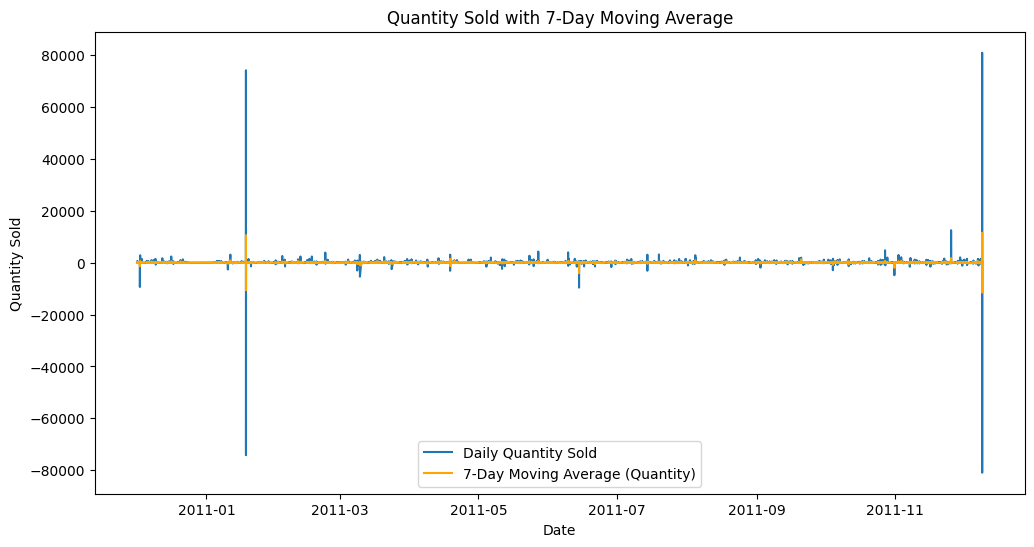

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_df['Quantity'], label='Daily Quantity Sold')
plt.plot(time_df['QuantityMovingAverage'], label='7-Day Moving Average (Quantity)', color='orange')
plt.title('Quantity Sold with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

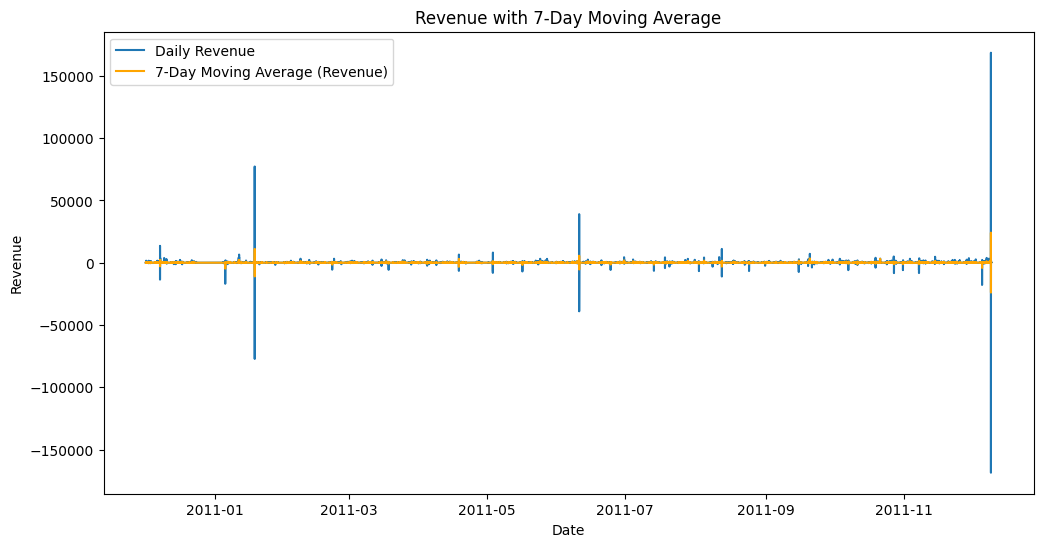

In [ ]:
time_df['RevenueMovingAverage'] = time_df['TotalRevenue'].rolling(window=7).mean()


# Plot the revenue data and the moving average for visualization
plt.figure(figsize=(12, 6))
plt.plot(time_df['TotalRevenue'], label='Daily Revenue')
plt.plot(time_df['RevenueMovingAverage'], label='7-Day Moving Average (Revenue)', color='orange')
plt.title('Revenue with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

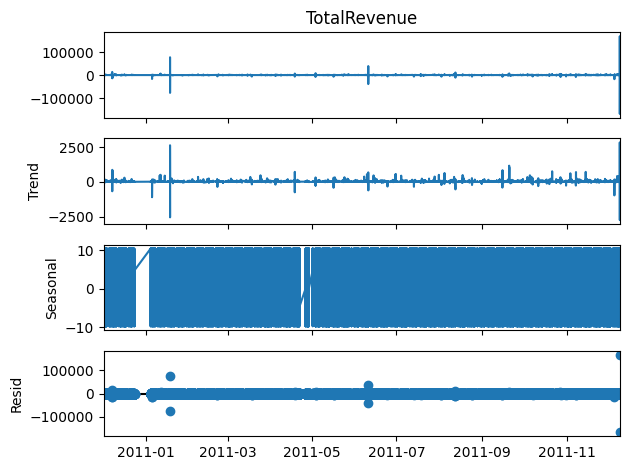

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(time_df['TotalRevenue'], model='additive', period=30)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

Interesting! We can see peaks around March and May. Then the obvious massive rise in the Ember months and a all time high mid November.. What could these mean. holiday shopping? Christmas and other holidays?

Demographics:
   - Age Distribution: Team1 Member 1 @ Getrude
   - Gender Breakdown: Team2 Member 2 @Omar
   - Common Occupations/Industries: Team3 Member3 @ Mr langat



Location:
   - Customer Locations:
   - Population Density:

Team1 Member2 @Toussaint
Team2 Member 3 @Nina
Team 4 member 3 @Hardeyronkeh

we are going to explore  customers by their respective countries, using their customer numbers for grouping. Although some Customer IDs were previously missing, the good news ! this will not affect our analysis, as each missing Customer ID has an associated country. This ensures that our dataset is complete and accurate for this purpose. Therefore, we can proceed with confidence in our country-based customer segmentation

In [ ]:
#Group the cleaned DataFrame by 'Country' and count the number of unique 'CustomerID' for each country
customer_counts_by_country = df_cleaned.groupby('Country')['CustomerID'].count().sort_values(ascending=False)

# creating the dataframe of customer_counts_by_country for better visualization
customer_counts_by_country_df = pd.DataFrame(customer_counts_by_country).reset_index()

customer_counts_by_country_df.columns = ["Country", "Total_Number_of_Customers"]

customer_counts_by_country_df

,Country,Total_Number_of_Customers
0,United Kingdom,488846
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


let's now display country with the highest number of customers

In [ ]:
#let's explore the top 5 country with high customers

customer_counts_by_country_df.head(5)

,Country,Total_Number_of_Customers
0,United Kingdom,488846
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528


here we can see **United Kingdom** has highest number of customers

We can use map to identify the density of customers using **geopandas** and **plotly** libary for better visualization and tracking of
 number of customers

In [ ]:
# import the neccessary libaries
import geopandas as gpd
import plotly.express as px


#load  and fetch the world map data
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# merge customer counts Dataframe with the world map data
merged_data=world.merge(customer_counts_by_country_df,how='left',left_on='name',right_on='Country')


# Plot the choropleth map using Plotly
fig=px.choropleth(
    merged_data,
    locations='iso_a3',
    color='Total_Number_of_Customers',
    hover_name='name',
    projection='natural earth',
    #color_continuous_scale='Viridis',# Color scale for customer density
    title='Country with their Customer Numbers ',
)

fig.show()

<ipython-input-50-f4c7d9ae0656>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Remember we have the missed customerid with was imputed with Null string we are going to explore the country which has most number of misssed customerID

In [ ]:
# Identify the rows where 'CustomerID' was imputed with a Null string

missed_custid_counts = df_cleaned[df_cleaned['CustomerID']=='Null']

# grouping Country with their customes of the filtered df of null customerId
missed_custid_country = missed_custid_counts.groupby('Country')['CustomerID'].count().sort_values(ascending=False)

# create DataFrame for better Visualization
missed_custid_country_df=pd.DataFrame(missed_custid_country).reset_index()

missed_custid_country_df.columns=["Country", "Total_Number_of_Customers"]

missed_custid_country_df

,Country,Total_Number_of_Customers
0,United Kingdom,132118
1,EIRE,709
2,Hong Kong,284
3,Unspecified,201
4,Switzerland,117
5,France,66
6,Israel,47
7,Portugal,39
8,Bahrain,2


Again the united kingdom has highest number of missed customer_Id,
what this demonstrate?

In [ ]:
# Calculate the percentage of missed CustomerIDs relative to the total number of customers in the United Kingdom
percentage_missing_customer_ids_uk = round((missed_custid_country['United Kingdom'] / customer_counts_by_country['United Kingdom']) * 100, 2)

print(f"The percentage of missed CustomerIDs in the United Kingdom is: {percentage_missing_customer_ids_uk}%")

The percentage of missed CustomerIDs in the United Kingdom is: 27.03%


 The United Kingdom having a significant customer base, the presence of a substantial percentage of missing CustomerIDs suggests a potential issue with data completeness. This could stem from various factors such as data entry errors, incomplete records, or discrepancies in the data collection process

To identify the location with the highest number of returned goods, we will analyze the data in the quantity column. Entries with negative values in this column will be considered as returned goods. The location with the highest sum of these negative values will be determined as having the most returned goods. This approach ensures a clear and accurate assessment of returns based on the data provided

In [ ]:
# to create the df for quantity that has returned quantity
returned_quantity = df_cleaned[df_cleaned['Quantity']<0]

# to grouping the country with amount of returned quaities
returned_qnty=returned_quantity.groupby('Country')['Quantity'].sum().sort_values().abs()

# to make dataframe for better visuallity
returned_quantity_df=pd.DataFrame(returned_qnty).reset_index()

returned_quantity_df.columns=["Country", "Total_Returned Qunaitities"]

returned_quantity_df





,Country,Total_Returned Qunaitities
0,United Kingdom,421845
1,EIRE,4786
2,Germany,1815
3,France,1623
4,USA,1424
5,Spain,1127
6,Netherlands,809
7,Japan,798
8,Australia,556
9,Sweden,446


Based on the analysis of returned goods, the UK has the highest number of returned quantities,This indicates that while the UK experiences a higher volume of returns, it is also a significant market with substantial purchase activity and dynamic consumer behavior.

The high return rate may suggest where customers frequently return products possibly due to dissatisfaction, changing preferences and many trends


Greece exhibits the fewest returned quantities, suggesting a lower rate of returns. This could imply higher customer satisfaction or a more selective purchasing behavior

 *Behavior*:
   - Common Purchase Categories/Products:
   - Average Order Value and Frequency:
   - Popular Channels for Engagement:

Team 1 Member 3 @Tobi Joshua

Team 2 Member 4 @Dede

Team 3 Member 1 @Amarachi

## Common Purchase Categories/Products

### 1. Analyzing Purchase Categories:
We explore potential purchase categories and their frequency by iterating through the 'Description' column. Assuming descriptions might contain category clues, we extract keywords based on word length and alphabetical characters. This is a starting point, and we might need to adjust it for our specific data. We then use Counter to count the occurrences of each extracted category, giving us insights into the most frequently purchased ones.

In [ ]:
# Considering that 'Description' column contains category clues
from collections import Counter  # For counting category occurrences (optional)

# Explore common purchase categories (using Description for potential clues)
def analyze_categories(df):
  """
  Analyzes potential purchase categories and identifies frequent items.

  Args:
      df (pandas.DataFrame): The cleaned DataFrame containing purchase data.

  Returns:
      None (prints analysis results to console)
  """

  # Extract potential category keywords from descriptions (optional)
  # This approach might require adjustments based on your data
  categories = []
  for desc in df['Description']:
    words = desc.split()  # Split description into words
    potential_category = [word for word in words if len(word) > 3 and word.isalpha()]  # Filter words with length > 3 and only letters
    if potential_category:
      categories.append(potential_category[0])  # Assuming the first relevant word is the category

  # Count category occurrences (alternative: using groupby)
  if categories:
    category_counts = Counter(categories)
    print("\n**Potential Purchase Categories (from Description):")
    for category, count in category_counts.most_common(10):  # Print top 10 most frequent
      print(f"- {category}: {count} occurrences")
  else:
    print("\n**Unable to extract clear categories from descriptions. Consider alternative methods.**")

### 2. Understanding Customer Behavior:
To delve into customer behavior, we group the data by the 'CustomerID'. This allows us to analyze spending patterns for each customer. We calculate their total spending by summing the 'UnitPrice' within each customer group. This helps us identify our top spending customers, the ones who contribute the most to overall sales. Additionally, we calculate the most frequent items purchased overall using the 'Description' column. This provides a general picture of the most popular products across all customers. We can further analyze frequent purchases for each individual by grouping by 'CustomerID'.

In [ ]:
# Analyze customer behavior (total spending, frequent items)
def analyze_customer_behavior(df):
  """
  Analyzes customer behavior by grouping data and calculating relevant metrics.

  Args:
      df (pandas.DataFrame): The cleaned DataFrame containing purchase data.

  Returns:
      None (prints analysis results to console)
  """

  # Group data by customer ID
  customer_groups = df.groupby('CustomerID')

  # Calculate total spending per customer
  total_spend_per_customer = customer_groups['UnitPrice'].sum()

  # Identify top 5 spending customers
  top_spenders = total_spend_per_customer.sort_values(ascending=False).head(5)

  # Calculate most frequent items purchased by all customers
  # (consider grouping by customer for individual customer analysis)
  all_item_counts = df['Description'].value_counts().head(10)  # Top 10 most frequent items

  # Print analysis results
  print("\n**Analysis of Customer Behavior:**")
  print(f"\n- Top 5 Spending Customers:")
  print(top_spenders)

  print(f"\n- Top 10 Most Frequently Purchased Items:")
  print(all_item_counts)

In [ ]:
# Analyzing the cleaned data
analyze_categories(df_cleaned.copy())  # Avoid modifying original data
analyze_customer_behavior(df_cleaned.copy())


**Potential Purchase Categories (from Description):
- JUMBO: 20723 occurrences
- RETROSPOT: 16885 occurrences
- LUNCH: 14873 occurrences
- VINTAGE: 13723 occurrences
- PACK: 13538 occurrences
- PINK: 12224 occurrences
- WOODEN: 8757 occurrences
- DOORMAT: 8346 occurrences
- BLUE: 8206 occurrences
- WHITE: 7564 occurrences

**Analysis of Customer Behavior:**

- Top 5 Spending Customers:
CustomerID
Null       1090875.12
14096.0      41376.33
15098.0      40278.90
14911.0      31025.29
12744.0      25108.89
Name: UnitPrice, dtype: float64

- Top 10 Most Frequently Purchased Items:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE H

In [ ]:
df_copy = df_cleaned.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Import libraries
import pandas as pd

# Calculate total spending per customer
df_copy['TotalPrice'] = df_copy['Quantity'] * df_copy['UnitPrice']
total_spend_per_customer = df_copy.groupby('CustomerID')['TotalPrice'].sum()

# Calculate number of transactions per customer
transactions_per_customer = df_copy.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate Average Order Value (AOV) per customer
aov_per_customer = total_spend_per_customer / transactions_per_customer

# Calculate the Frequency per customer
frequency_per_customer = df_copy.groupby('CustomerID')['InvoiceNo'].count()

customer_behavior_metrics = pd.DataFrame({
    'CustomerTotalSpend': total_spend_per_customer,
    'Transactions': transactions_per_customer,
    'AverageOrderValue': aov_per_customer,
    'Frequency': frequency_per_customer
})

In [ ]:
customer_behavior_metrics.head()

,CustomerTotalSpend,Transactions,AverageOrderValue,Frequency
CustomerID,,,,
12346.0,0.00,2,0.000000,2
12347.0,4310.00,7,615.714286,182
12348.0,1797.24,4,449.310000,31
12349.0,1757.55,1,1757.550000,73
12350.0,334.40,1,334.400000,17


4. *Preferences*:
   - Common Interests/Hobbies:
   - Preferred Communication Channels:
   - Popular Loyalty Programs/Rewards:

Team 2 member1 @kami D sima

Team 4 member 1@faith

Team 4 member 3 @Hardeyronkeh

5. *Needs*:
   - Common Pain Points/Challenges: Team Member 1&3
   - Sought-After Solutions/Products: Team Member 2
   - Reasons for Customer Churn/Attrition: Team Member 4

# Segmentation

Next part of Segementation

1. clean description text removing stop words
2. ⁠Tokenization and feature extraction
3. ⁠combine features
4. ⁠Clustering and segmenting customers to the classes we create

1.Clean and  clean description text removing stop words
### Team 1
@Getrude
@Toussaint
@Tobi Joshua



In [ ]:
# start by  viewing cleaned df

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Starting the Natural Language Processing (NLP) process involves several important steps. First, we clean the text by removing URL links, emojis, punctuation, and numbers. After that, we eliminate stopwords to ensure the text is ready for further processing.


In [ ]:
# import neccessary Libaries
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Ensure you have downloaded the necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# showing the length of description column
len(df_cleaned['Description'])

535187

In [ ]:
def clean_text(text):
  """
  Clean text by removing punctuation, digits, multiple spaces, and stop words.

  Args:
      text (str): The text to be cleaned.

  Returns:
      list: The cleaned text as a list of tokens.
  """

  # Remove punctuation and digits using translation table
  remove_chars = string.punctuation + string.digits
  translator = str.maketrans('', '', remove_chars)
  text = text.translate(translator)

  # Remove multiple spaces, leading/trailing whitespace, and lowercase
  text = re.sub(r'\s+', ' ', text).strip().lower()

  # Tokenize and remove stopwords
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  cleaned_text = [word for word in tokens if word not in stop_words]

  return cleaned_text

In [ ]:
# Apply the function to the 'Description' column
cleaned_text = df_cleaned['Description'].apply(clean_text)

In [ ]:
# display few elements of cleaned_text
cleaned_text

0            [white, hanging, heart, tlight, holder]
1                            [white, metal, lantern]
2               [cream, cupid, hearts, coat, hanger]
3         [knitted, union, flag, hot, water, bottle]
4                [red, woolly, hottie, white, heart]
                             ...                    
541904                     [pack, spaceboy, napkins]
541905               [childrens, apron, dolly, girl]
541906             [childrens, cutlery, dolly, girl]
541907          [childrens, cutlery, circus, parade]
541908               [baking, set, piece, retrospot]
Name: Description, Length: 535187, dtype: object

In [ ]:
# add column to cleaned df of cleaned text of description
df_cleaned['cleaned_Description'] = df_cleaned['Description'].apply(clean_text)

In [ ]:
df_cleaned['cleaned_Description'].head()

0       [white, hanging, heart, tlight, holder]
1                       [white, metal, lantern]
2          [cream, cupid, hearts, coat, hanger]
3    [knitted, union, flag, hot, water, bottle]
4           [red, woolly, hottie, white, heart]
Name: cleaned_Description, dtype: object

finding the words that occurred the least

In [ ]:
from collections import Counter

def find_least_frequent_words(cleaned_descriptions, num_words=10):
  """
  Finds the 10 least frequent words in the combined cleaned text.

  Args:
      cleaned_descriptions (list): A list of cleaned descriptions (each as a list of tokens).
      num_words (int, optional): The number of least frequent words to find. Defaults to 10.

  Returns:
      list: A list of the num_words least frequent words along with their counts.
  """

  # Combine all cleaned descriptions into one list of tokens
  all_tokens = []
  for desc in cleaned_descriptions:
    all_tokens.extend(desc)

  # Count word occurrences
  word_counts = Counter(all_tokens)

  # Find the least frequent words
  least_frequent = word_counts.most_common()[-num_words:]  # Get the last 'num_words' elements

  return least_frequent

# Example usage (assuming 'cleaned_descriptions' is a list of cleaned descriptions)
least_frequent_words = find_least_frequent_words(cleaned_text)

# Print the 10 least frequent words
print("10 Least Frequent Words:")
for word, count in least_frequent_words:
  print(f"- {word}: {count} occurrences")


10 Least Frequent Words:
- triangle: 1 occurrences
- icons: 1 occurrences
- mrked: 1 occurrences
- carton: 1 occurrences
- men: 1 occurrences
- dotcomstock: 1 occurrences
- john: 1 occurrences
- lewis: 1 occurrences
- lilacred: 1 occurrences
- u: 1 occurrences


checking the words that ocurred only once or twice

In [ ]:

from collections import Counter

def find_rare_words(cleaned_descriptions, num_occurrences=2):
  """
  Finds words that occur only once or twice in the combined cleaned text.

  Args:
      cleaned_descriptions (list): A list of cleaned descriptions (each as a list of tokens).
      num_occurrences (int, optional): The maximum number of occurrences for a word to be considered rare. Defaults to 2.

  Returns:
      list: A list of words that occur 'num_occurrences' times or less.
  """

  # Combine all cleaned descriptions into one list of tokens
  all_tokens = []
  for desc in cleaned_descriptions:
    all_tokens.extend(desc)

  # Count word occurrences
  word_counts = Counter(all_tokens)

  # Find words with 'num_occurrences' or less occurrences
  rare_words = [word for word, count in word_counts.items() if count <= num_occurrences]

  return rare_words

# usage (assuming 'cleaned_text' is a list of cleaned text)
rare_words = find_rare_words(cleaned_text)

# Print the rare words
print("Words Occurring Once or Twice:")
for word in rare_words:
  list_of_words = []
  list_of_words.append(word)
  print(f"- {word}")

Words Occurring Once or Twice:
- girly
- sow
- marshmallow
- dr
- jams
- arouzer
- stress
- loveheart
- tinsel
- weekend
- tools
- bluegreen
- kashmiri
- blackchristmas
- pouri
- mao
- cab
- electronic
- beauty
- boombox
- ipod
- char
- sunjar
- faulty
- demi
- choker
- opulent
- snowflakepink
- pinkamethyst
- wraps
- usb
- anemone
- banner
- cannabis
- collar
- cutglass
- flamingo
- counted
- given
- label
- samplesdamages
- ooh
- bazaar
- mcolour
- madethrown
- bluenat
- purpleblue
- scallop
- heavens
- fragrance
- oils
- orangewhtfuschia
- showroom
- guitar
- mia
- purpleturq
- damagesdisplay
- broken
- canary
- problem
- pinkamethystgold
- glasses
- awaycant
- sell
- rcvd
- temp
- fix
- sit
- flowerbutterfly
- mummy
- quick
- mystery
- ever
- imported
- merchant
- chandler
- credit
- error
- sto
- possible
- yelloworange
- chests
- tick
- ret
- orangefuschia
- antoienett
- returned
- maxwell
- page
- laser
- haynes
- camper
- damagesshowroom
- etc
- damagescredits
- asos
- sizes
- 

In [ ]:
# # run a code that checks grammatically correct words and prints out the ones that are not correct

# # list of bad words
# bad_words = []

# # initialize the lists
# # list 1 - list of words that occur once or twice
# list_of_words

# # list 2 - list of corrected words
# correct_words = [
#     "girly", "sow", "marshmallow", "dr", "jams", "arouzer", "stress", "love", "heart", "tinsel",
#     "weekend", "tools", "blue", "green", "kashmiri", "black", "christmas", "pouri", "mao", "cab",
#     "electronic", "beauty", "boombox", "ipod", "char", "sunjar", "faulty", "demi", "choker", "opulent",
#     "snow", "flake", "pink", "pink", "amethyst", "wraps", "usb", "anemone", "banner", "cannabis",
#     "collar", "cut", "glass", "flamingo", "counted", "given", "label", "samples", "damages", "ooh",
#     "bazaar", "mcolour", "made", "thrown", "blue", "nat", "purple", "blue", "scallop", "heavens",
#     "fragrance", "oils", "orange", "what", "fuschia", "showroom", "guitar", "mia", "purple", "turq",
#     "damages", "display", "broken", "canary", "problem", "pink", "amethyst", "gold", "glasses",
#     "away", "cant", "sell", "rcvd", "temp", "fix", "sit", "flower", "butterfly", "mummy", "quick",
#     "mystery", "ever", "imported", "merchant", "chandler", "credit", "error", "sto", "possible",
#     "yellow", "orange", "chests", "tick", "ret", "orange", "fuschia", "antoienett", "returned",
#     "maxwell", "page", "laser", "haynes", "camper", "damages", "showroom", "etc", "damages",
#     "credits", "asos", "sizes", "delivery", "away", "rusty", "wet", "rusty", "damages", "dotcom",
#     "cargo", "white", "silver", "capiz", "credited", "see", "previous", "hold", "damage", "dolphin",
#     "necklgreen", "through", "a", "brass", "came", "alan", "hodge", "mamage", "section", "beadshand",
#     "fba", "branch", "creditted", "damages", "samples", "angel", "pink", "teddy", "cake", "ctn",
#     "allocate", "ta", "add", "online", "retail", "oops", "whse", "website", "fixed", "draw",
#     "dagamed", "water", "pump", "historic", "computer", "differences", "trading", "zero", "invc",
#     "incorr", "michel", "poinsettia", "artonly", "mini", "cards", "wet", "mouldy", "find", "necklace",
#     "leaf", "partition", "panel", "pallet", "thrown", "sale", "mirror", "portraits", "readjustment",
#     "breakages", "jackie", "triangle", "icons", "silt", "squ", "wax", "chrome", "marked", "carton",
#     "men", "candle", "incense", "deck", "halls", "dotcomstock", "john", "lewis", "lilac", "acred",
#     "u", "birdie"
# ]

# # iterate over the original list
# for words in list_of_words:
#   # check if they are in the corrected list
#   if words in correct_words:
#     pass
#   # if they aren't
#   else:
#     # put them in the list of bad words
#     bad_words.append(words)



# # then drop the bad words
# cleaned_text = [words for words in cleaned_text if words not in bad_words]


In [ ]:
new_rare_words = find_rare_words(cleaned_text)

# Print the rare words
print("Words Occurring Once or Twice:")
for word in new_rare_words:
  new_list = []
  new_list.append(word)
  print(f"- {word}")

Words Occurring Once or Twice:
- girly
- sow
- marshmallow
- dr
- jams
- arouzer
- stress
- loveheart
- tinsel
- weekend
- tools
- bluegreen
- kashmiri
- blackchristmas
- pouri
- mao
- cab
- electronic
- beauty
- boombox
- ipod
- char
- sunjar
- faulty
- demi
- choker
- opulent
- snowflakepink
- pinkamethyst
- wraps
- usb
- anemone
- banner
- cannabis
- collar
- cutglass
- flamingo
- counted
- given
- label
- samplesdamages
- ooh
- bazaar
- mcolour
- madethrown
- bluenat
- purpleblue
- scallop
- heavens
- fragrance
- oils
- orangewhtfuschia
- showroom
- guitar
- mia
- purpleturq
- damagesdisplay
- broken
- canary
- problem
- pinkamethystgold
- glasses
- awaycant
- sell
- rcvd
- temp
- fix
- sit
- flowerbutterfly
- mummy
- quick
- mystery
- ever
- imported
- merchant
- chandler
- credit
- error
- sto
- possible
- yelloworange
- chests
- tick
- ret
- orangefuschia
- antoienett
- returned
- maxwell
- page
- laser
- haynes
- camper
- damagesshowroom
- etc
- damagescredits
- asos
- sizes
- 

⁠Tokenization and feature extraction


### Team 2
@kami D sama
@Omar
@Nina
@dede

⁠3.combine features

Team 3
@Amarachi @Franklin @Mr langat

4.⁠Clustering and segmenting customers to the classes we create



Team 4 @Faithful @Jesse @Hardeyronkeh @Praise Cookie

**End of Section**
________________________
________________________________________________